In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statistics as st

def outlier_detect(attr):
    q1=np.percentile(attr,25)
    q3=np.percentile(attr,75)
    iqr=q3-q1
    a=[]
    for i in range(len(attr)):
        if (attr[i]>(q3+(1.5*iqr)) or attr[i]<(q1-(1.5*iqr))):
            a.append(i)
    return a

data = pd.read_csv("pima-indians-diabetes.csv")

med_df = data.copy()

pregs = data["pregs"].tolist()
plas = data["plas"].tolist()
pres = data["pres"].tolist()
skin = data["skin"].tolist()
test = data["test"].tolist()
bmi = data["BMI"].tolist()
pedi = data["pedi"].tolist()
age = data["Age"].tolist()
clas = data["class"].tolist()

attributes_names = ["pregs","plas","pres","skin","test","BMI","pedi","Age","Class"]
attributes = [pregs,plas,pres,skin,test,bmi,pedi,age,clas]

for i in range (8):
    q1 = med_df[attributes_names[i]].quantile(0.25)
    q2 = med_df[attributes_names[i]].quantile(0.5)
    q3 = med_df[attributes_names[i]].quantile(0.75)
    med_df[attributes_names[i]] = np.where(med_df[attributes_names[i]] > q3, q2 ,med_df[attributes_names[i]])
    med_df[attributes_names[i]] = np.where(med_df[attributes_names[i]] < q1, q2 ,med_df[attributes_names[i]])
    # print(med_df[attributes_names[i]].skew())

#Standaradizing

norm_df = med_df.copy()
std_df = med_df.copy()

for column in norm_df.columns:
    norm_df[column] = (norm_df[column] - norm_df[column].min()) / (norm_df[column].max() - norm_df[column].min())
    norm_df[column] = (norm_df[column]*7) + 5     
  

for i in range(8):
    print("The max value of the attribute " + attributes_names[i] + " was:" + str(max(data[attributes_names[i]])))
    print("The max value of the attribute " + attributes_names[i] + "after normalization is: " + str(max(norm_df[attributes_names[i]])))
    print()
    print("The min value of the attribute " + attributes_names[i] + " was:" + str(min(data[attributes_names[i]])))
    print("The min value of the attribute " + attributes_names[i] + " after normalization is: " + str(min(norm_df[attributes_names[i]])))
    print("************************************************************************")

for column in std_df.columns:
    std_df[column] = (std_df[column] - std_df[column].mean()) / std_df[column].std()

for i in range(8):
    print("The mean value of the attribute " + attributes_names[i] + " was:" + str(data[attributes_names[i]].mean()))
    print("The mean value of the attribute " + attributes_names[i] + " after normalization is: " + str(std_df[attributes_names[i]].mean()))
    print()
    print("The standard deviation value of the attribute " + attributes_names[i] + " was:" + str(data[attributes_names[i]].std()))
    print("The standard deviation value of the attribute " + attributes_names[i] + " after normalization is: " + str(std_df[attributes_names[i]].std()))
    print("************************************************************************")


The max value of the attribute pregs was:17
The max value of the attribute pregsafter normalization is: 12.0

The min value of the attribute pregs was:0
The min value of the attribute pregs after normalization is: 5.0
************************************************************************
The max value of the attribute plas was:199
The max value of the attribute plasafter normalization is: 12.0

The min value of the attribute plas was:0
The min value of the attribute plas after normalization is: 5.0
************************************************************************
The max value of the attribute pres was:122
The max value of the attribute presafter normalization is: 12.0

The min value of the attribute pres was:0
The min value of the attribute pres after normalization is: 5.0
************************************************************************
The max value of the attribute skin was:99
The max value of the attribute skinafter normalization is: 12.0

The min value of the attr

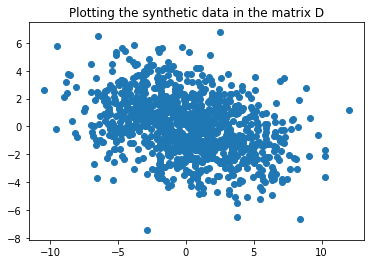

************************************************************************
The eigenvalues are:
 [14.  4.] 

The eigenvectors are:
 [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]] 



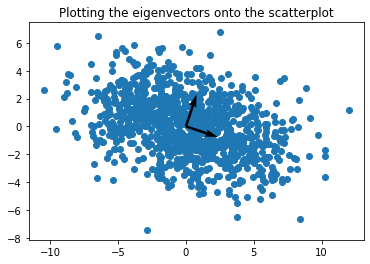

************************************************************************


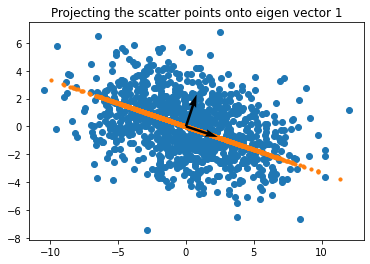

************************************************************************


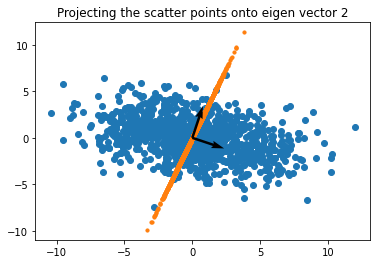

************************************************************************
The reconstruction error is = 1.551722240886443e-17


In [2]:
#Question 2
#Part A

mean_mat = [0,0]
corr_mat = np.array([[13, -3], [-3, 5]])

D = np.random.multivariate_normal(mean_mat, corr_mat, 1000) #Creating the synthetic data

x,y = D.T #fetching the X and Y values of the synthetic data to plot them

plt.scatter(x,y)
plt.title("Plotting the synthetic data in the matrix D")
plt.show()
print("************************************************************************")

#Part B

eig_val, eig_vec = np.linalg.eig(corr_mat) # getting the eigenvalues and eigenvectors of the correlation matrix

eig_vec1 = eig_vec[:,0]
eig_vec2 = eig_vec[:,1]

print("The eigenvalues are:\n",eig_val,'\n')
print("The eigenvectors are:\n",eig_vec,'\n')

origin = [0,0] # getting the origin for plotting in quiver

plt.scatter(x,y)
plt.quiver(*origin,*eig_vec1,scale = 10,color = "black")
plt.quiver(*origin,*eig_vec2,scale = 10,color = "black")
plt.title("Plotting the eigenvectors onto the scatterplot")
plt.show()
print("************************************************************************")

#Part C

project_on_1 = np.outer(eig_vec1,D) 
# basically doing the dot product of the eigen vector with all the points present in the scatter plot as dot product is the projection of a vector
# on another vector and this is exactly what we need


x1,y1 = project_on_1 #extracting the new x and y values for plotting the scatter plot of projections on eigenvector 1                

plt.scatter(x,y)
plt.scatter(x1,y1,s=10)
plt.quiver(*origin,*eig_vec1,scale = 10,color = "black")
plt.quiver(*origin,*eig_vec2,scale = 10,color = "black")
plt.title("Projecting the scatter points onto eigen vector 1")
plt.show()
print("************************************************************************")


project_on_2 = np.outer(eig_vec2,D)
x2,y2 = project_on_2

plt.scatter(x,y)
plt.scatter(x2,y2,s=10)
plt.quiver(*origin,*eig_vec1,scale = 10,color = "black")
plt.quiver(*origin,*eig_vec2,scale = 10,color = "black")
plt.title("Projecting the scatter points onto eigen vector 2")
plt.show()
print("************************************************************************")

#Part C
# Reconstructing the original matrix
# For this we will be using linear combination concept i.e. to get data point x1,y1 back using the eigenvectors
# We will use the projection of x1,y1 on the eigenvectors.
# We can do this because the 2 eigenvectors are linearly independent as can be seen from graph 2
# That means that their linear span is the while 2D.
 
new_D = []

dot_eig1 = []
dot_eig2 = []

for i in range(1000):
    dot_eig1.append(np.dot(D[i],eig_vec1))
    dot_eig2.append(np.dot(D[i],eig_vec2))

for i in range(1000):
    new_x = eig_vec2[0]*dot_eig2[i] + eig_vec1[0]*dot_eig1[i]
    new_y = eig_vec2[1]*dot_eig2[i] + eig_vec1[1]*dot_eig1[i]
    temp = [new_x,new_y]
    new_D.append(temp)

err = 0

for i in range(1000):
    err += (((D[i][0] - new_D[i][0])**2) + ((D[i][1]-new_D[i][1])**2))

err = (err)**0.5/1000

print("The reconstruction error is =",err)



The original covariance matrix: 
       pregs   plas   pres   skin   test    BMI   pedi    Age  class
pregs  1.000  0.023  0.082 -0.137 -0.168  0.007 -0.050  0.192  0.102
plas   0.023  1.000  0.049 -0.057 -0.064  0.009 -0.002  0.079  0.143
pres   0.082  0.049  1.000 -0.059 -0.082  0.023 -0.021  0.043  0.039
skin  -0.137 -0.057 -0.059  1.000  0.454  0.098  0.102 -0.064  0.004
test  -0.168 -0.064 -0.082  0.454  1.000  0.026  0.048 -0.119 -0.119
BMI    0.007  0.009  0.023  0.098  0.026  1.000 -0.013 -0.008  0.096
pedi  -0.050 -0.002 -0.021  0.102  0.048 -0.013  1.000 -0.090  0.014
Age    0.192  0.079  0.043 -0.064 -0.119 -0.008 -0.090  1.000  0.166
class  0.102  0.143  0.039  0.004 -0.119  0.096  0.014  0.166  1.000
************************************************************************
The eigenvalues are:

 [1.73455422 0.52256266 1.23889726 0.75687668 0.80802951 1.03269879
 0.96089137 0.95384426 0.99164525]
************************************************************************
The ei

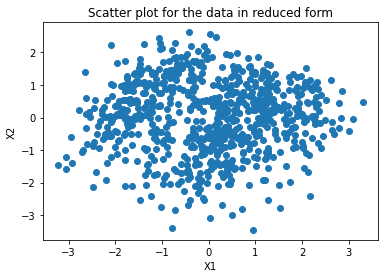

************************************************************************
The variance of the reduced dataframe is:

0    1.734554
1    1.238897
dtype: float64
The highest eigenvalue was = 1.7345542211561336 and second highest eigenvalue was = 1.238897259318454
************************************************************************


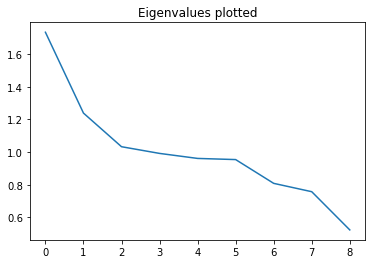

************************************************************************
The covariance when the number of dimensions = 1
[[ 0.21355428 -0.15670923  0.22465868 ... -0.12399356  0.19953279
  -0.15011964]
 [-0.15670923  0.11499551 -0.1648578  ...  0.09098828 -0.14642006
   0.11015997]
 [ 0.22465868 -0.1648578   0.23634049 ... -0.13044098  0.2099081
  -0.15792557]
 ...
 [-0.12399356  0.09098828 -0.13044098 ...  0.07199296 -0.11585243
   0.08716224]
 [ 0.19953279 -0.14642006  0.2099081  ... -0.11585243  0.18643192
  -0.14026313]
 [-0.15011964  0.11015997 -0.15792557 ...  0.08716224 -0.14026313
   0.10552777]]
The reconstruction error = 7.255985562986016
************************************************************************
The covariance when the number of dimensions = 2
[[ 0.25350886 -0.16314777  0.21354846 ... -0.09613791  0.17667252
  -0.17033504]
 [-0.16314777  0.11564606 -0.16216861 ...  0.08563594 -0.14171816
   0.11328449]
 [ 0.21354846 -0.16216861  0.23734234 ... -0.1361813   0.2

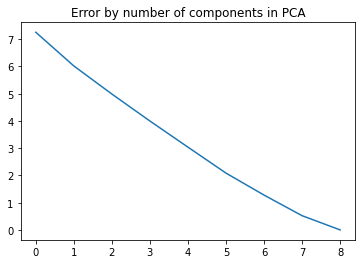

Original covariance :
       pregs   plas   pres   skin   test    BMI   pedi    Age  class
pregs  1.000  0.023  0.082 -0.137 -0.168  0.007 -0.050  0.192  0.102
plas   0.023  1.000  0.049 -0.057 -0.064  0.009 -0.002  0.079  0.143
pres   0.082  0.049  1.000 -0.059 -0.082  0.023 -0.021  0.043  0.039
skin  -0.137 -0.057 -0.059  1.000  0.454  0.098  0.102 -0.064  0.004
test  -0.168 -0.064 -0.082  0.454  1.000  0.026  0.048 -0.119 -0.119
BMI    0.007  0.009  0.023  0.098  0.026  1.000 -0.013 -0.008  0.096
pedi  -0.050 -0.002 -0.021  0.102  0.048 -0.013  1.000 -0.090  0.014
Age    0.192  0.079  0.043 -0.064 -0.119 -0.008 -0.090  1.000  0.166
class  0.102  0.143  0.039  0.004 -0.119  0.096  0.014  0.166  1.000
************************************************************************
New covariacnce =
[[ 0.87049572 -0.20786006  0.30821659 ... -0.00460346 -0.1413096
  -0.21679224]
 [-0.20786006  0.66421082 -0.02428812 ... -0.17243594 -0.11239857
   0.50175825]
 [ 0.30821659 -0.02428812  0.9468308

In [3]:
#Question 3

#Part A
#using std_df as per the question
#obtaining the covariance table
from audioop import reverse


cov_mat = std_df.cov()

print("The original covariance matrix: ")
print(round(cov_mat,3))

eig_vals,eig_vecs = np.linalg.eig(cov_mat) #getting the eigenvalues and eigenvectors

print("************************************************************************")
print("The eigenvalues are:\n\n",eig_vals)
print("************************************************************************")
print("The eigenvectors are:\n\n",eig_vecs)
print("************************************************************************")

#since we want to reduce the dimensionality to 2 we will use the two eigenvectors with the highest eigenvalues

eig_vec1 = eig_vecs[:,0] #highest eigenvalue
eig_vec2 = eig_vecs[:,2] #2nd highest eigenvalue


eig_for_dot = np.column_stack((eig_vec1,eig_vec2)) 

reduced_df = std_df.dot(eig_for_dot) #projecting the data onto eigenvector 1 and eigenvector 2 to get the reduced dataset

print(reduced_df)
print("************************************************************************")

plt.scatter(reduced_df[0], reduced_df[1])
plt.title("Scatter plot for the data in reduced form")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
print("************************************************************************")


print("The variance of the reduced dataframe is:\n")
print(reduced_df.var())

eig_in_desc = np.sort(eig_vals)[::-1]

print("The highest eigenvalue was =",eig_vals[0],"and second highest eigenvalue was =",eig_vals[2])
print("************************************************************************")


#Part B

plt.plot(eig_in_desc)
plt.title("Eigenvalues plotted")
plt.show()
print("************************************************************************")


#Part C

recon_error_list = []

for i in range(1,10):
    pca = PCA(n_components=i)
    pca.fit(std_df)
    x_pca = pca.fit_transform(std_df)
    x_recon = pca.inverse_transform(x_pca)
    print("The covariance when the number of dimensions =",i)
    print(np.cov(x_recon))
    loss = np.sum((std_df - x_recon) ** 2, axis=1).mean()
    recon_error_list.append(loss)
    print("The reconstruction error =",loss)
    print("************************************************************************")

plt.plot(recon_error_list)
plt.title("Error by number of components in PCA")
plt.show()


#Part D

print("Original covariance :")
print(round(std_df.cov(),3))
print("************************************************************************")
pca = PCA(n_components=i)
pca.fit(std_df)
x_pca = pca.fit_transform(std_df)
x_recon = pca.inverse_transform(x_pca)
print("New covariacnce =")
print(np.cov(x_recon))
print("************************************************************************")


